In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
data = df.copy()
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [8]:
data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
data.duplicated().sum()

29

In [11]:
data = data.drop_duplicates()

In [12]:
data.shape

(1274, 11)

In [13]:
data.duplicated().sum()

0

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   object 
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   object 
 10  Price             1274 non-null   float64
dtypes: float64(2), object(9)
memory usage: 119.4+ KB


In [15]:
data['Ram'] = data['Ram'].str.replace('GB','').astype('int')
data['Weight'] = data['Weight'].str.replace('kg','').astype('float')

In [16]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int64  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 119.4+ KB


In [18]:
data['Price'] = data['Price'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int64  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 119.4+ KB


In [19]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095


In [20]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [21]:
data[data['ScreenResolution'].str.contains('IPS')].shape

(357, 11)

In [22]:
data['ips'] = data['ScreenResolution'].apply(lambda x : 1 if 'IPS' in x else 0)

In [23]:
data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ips
969,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6,256GB SSD,Nvidia GeForce 920MX,Windows 10,2.40,37029,0
837,Toshiba,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.00,35644,0
1083,HP,Ultrabook,13.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.30,109170,1
1015,Toshiba,Notebook,13.3,1366x768,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.50,64468,0
827,Dell,Notebook,14.0,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.76,31168,0


In [24]:
data['touchscreen'] = data['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

In [25]:
data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ips,touchscreen
1187,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Nvidia GeForce 940MX,Windows 10,2.23,36816,0,0
889,Lenovo,Notebook,17.3,1600x900,AMD A4-Series 7210 2.2GHz,4,500GB HDD,AMD Radeon R3,Windows 10,2.80,20193,0,0
1138,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,3.78,127818,0,0
346,HP,Notebook,14.0,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.44,14865,0,0
920,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,1TB HDD,AMD Radeon R5 M420,Windows 10,2.18,36496,0,0


In [26]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ips,touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,1,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,1,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,1,0


In [27]:
split = data['ScreenResolution'].str.split('x',n=1,expand=True)
split.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [28]:
type(split)

pandas.core.frame.DataFrame

In [29]:
data['screenW'] = split[0]
data['screenH'] = split[1]

In [30]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ips,touchscreen,screenW,screenH
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,1,0,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,1,0,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,1,0,IPS Panel Retina Display 2560,1600


In [31]:
data['screenW'] = data['screenW'].str.findall('\d{3,4}').apply(lambda x:x[0])
# type(data['screenW'].str.findall('\d{4}'))


In [32]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ips,touchscreen,screenW,screenH
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,1,0,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,1,0,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,1,0,2560,1600


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int64  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   int64  
 11  ips               1274 non-null   int64  
 12  touchscreen       1274 non-null   int64  
 13  screenW           1274 non-null   object 
 14  screenH           1274 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 159.2+ KB


In [34]:
data['screenW'] = data['screenW'].astype('int')
data['screenH'] = data['screenH'].astype('int')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int64  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   int64  
 11  ips               1274 non-null   int64  
 12  touchscreen       1274 non-null   int64  
 13  screenW           1274 non-null   int64  
 14  screenH           1274 non-null   int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 159.2+ KB


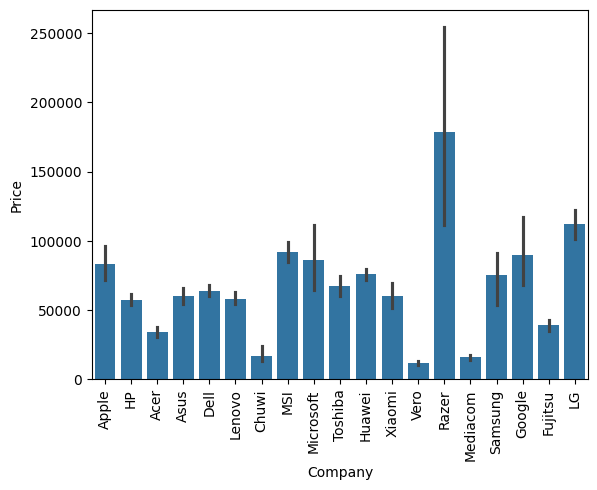

In [36]:
sns.barplot(x=data['Company'],y=data['Price'])
plt.xticks(rotation=90)
plt.show()

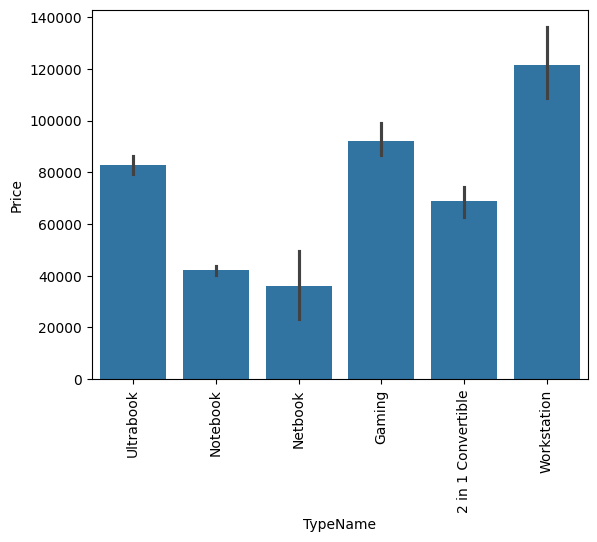

In [37]:
sns.barplot(x=data['TypeName'],y=data['Price'])
plt.xticks(rotation=90)
plt.show()

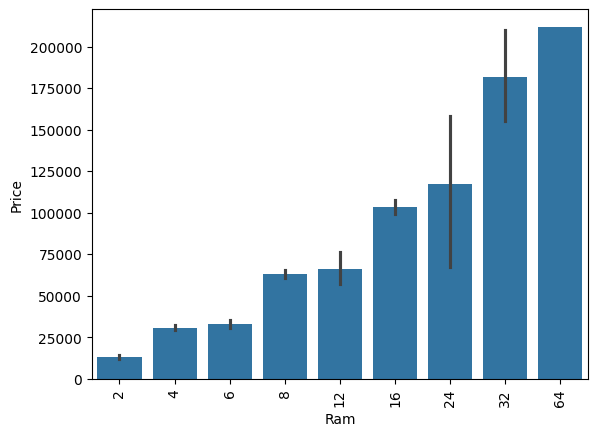

In [38]:
sns.barplot(x=data['Ram'],y=data['Price'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='ips', ylabel='Price'>

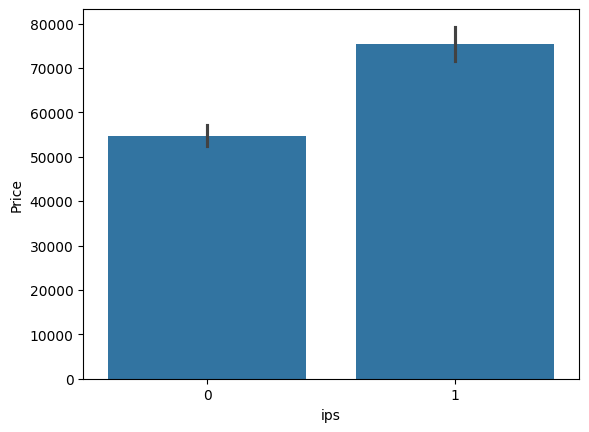

In [39]:
sns.barplot(x=data['ips'],y=data['Price'])


<Axes: xlabel='touchscreen', ylabel='Price'>

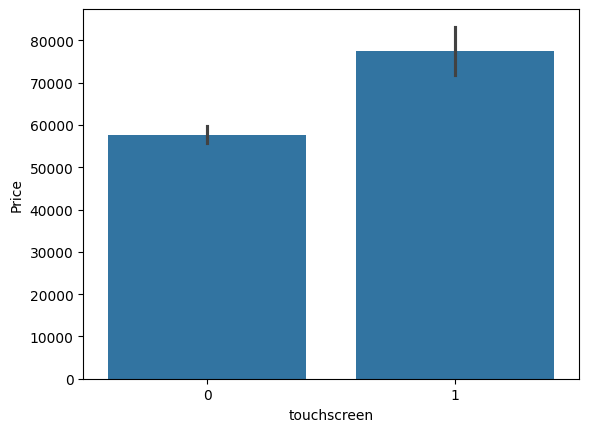

In [40]:
sns.barplot(x=data['touchscreen'],y=data['Price'])


In [41]:
data.corr(numeric_only=True)['Price']

Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
ips            0.250357
touchscreen    0.188630
screenW        0.552074
screenH        0.548111
Name: Price, dtype: float64

In [42]:
data['ppi'] = ((np.sqrt((data['screenW']**2) + (data['screenH']**2)))/data['Inches']).astype('int')

In [43]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ips,touchscreen,screenW,screenH,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,1,0,2560,1600,226
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440,900,127
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,1920,1080,141
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,1,0,2880,1800,220
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,1,0,2560,1600,226


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int64  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   int64  
 11  ips               1274 non-null   int64  
 12  touchscreen       1274 non-null   int64  
 13  screenW           1274 non-null   int64  
 14  screenH           1274 non-null   int64  
 15  ppi               1274 non-null   int64  
dtypes: float64(2), int64(7), object(7)
memory usage

In [45]:
data.corr(numeric_only=True)['Price']

Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
ips            0.250357
touchscreen    0.188630
screenW        0.552074
screenH        0.548111
ppi            0.469306
Name: Price, dtype: float64

In [46]:
data.drop(columns=['screenW','screenH','ScreenResolution'],inplace=True)

In [47]:
data.head(20)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ips,touchscreen,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,1,0,226
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,1,0,220
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,1,0,226
5,Acer,Notebook,15.6,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312,0,0,100
6,Apple,Ultrabook,15.4,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017,1,0,220
7,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735,0,0,127
8,Asus,Ultrabook,14.0,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79653,0,0,157
9,Acer,Ultrabook,14.0,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,41025,1,0,157


In [48]:
data['Company'].unique()
data['TypeName'].unique()
data['OpSys'].unique()
data['Memory'].unique()
data['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [49]:
data['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: count, Length: 118, dtype: int64

In [50]:
data['cpu_name'] = data['Cpu'].str.split().apply(lambda x : " ".join(x[:3]))

In [51]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ips,touchscreen,ppi,cpu_name
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,1,0,226,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,1,0,220,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,1,0,226,Intel Core i5


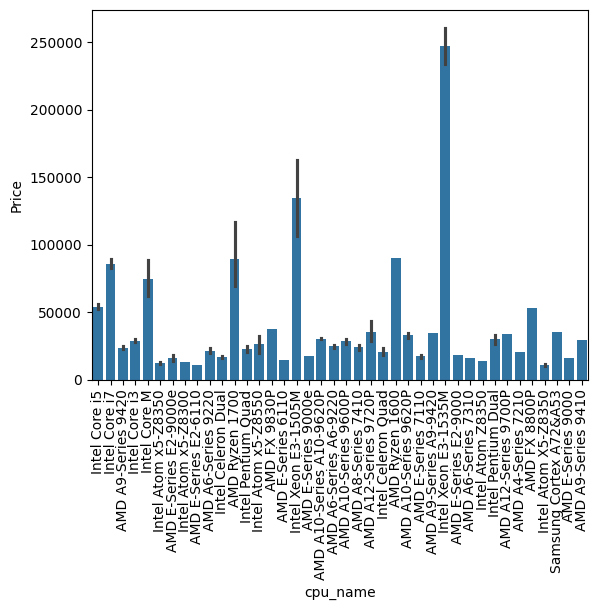

In [52]:
sns.barplot(x='cpu_name',y='Price',data=data)
plt.xticks(rotation=90)
plt.show()

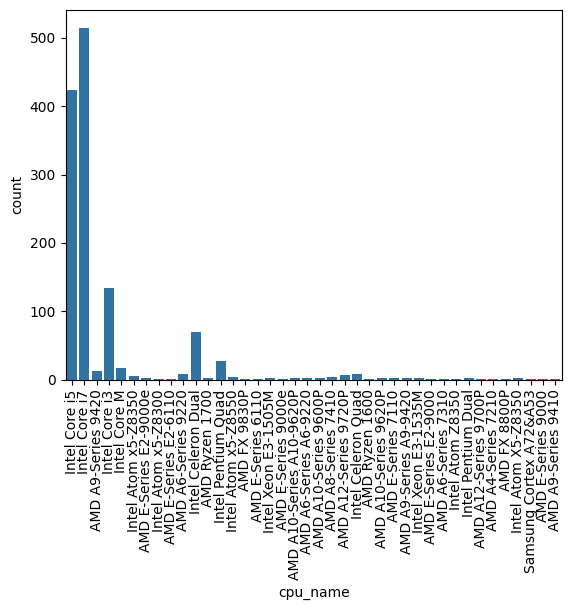

In [53]:
sns.countplot(x='cpu_name',data=data)
plt.xticks(rotation=90)
plt.show()

In [54]:
data['cpu_name'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD A9-Series 9420',
       'Intel Core i3', 'Intel Core M', 'Intel Atom x5-Z8350',
       'AMD E-Series E2-9000e', 'Intel Atom x5-Z8300',
       'AMD E-Series E2-6110', 'AMD A6-Series 9220', 'Intel Celeron Dual',
       'AMD Ryzen 1700', 'Intel Pentium Quad', 'Intel Atom x5-Z8550',
       'AMD FX 9830P', 'AMD E-Series 6110', 'Intel Xeon E3-1505M',
       'AMD E-Series 9000e', 'AMD A10-Series A10-9620P',
       'AMD A6-Series A6-9220', 'AMD A10-Series 9600P',
       'AMD A8-Series 7410', 'AMD A12-Series 9720P', 'Intel Celeron Quad',
       'AMD Ryzen 1600', 'AMD A10-Series 9620P', 'AMD E-Series 7110',
       'AMD A9-Series A9-9420', 'Intel Xeon E3-1535M',
       'AMD E-Series E2-9000', 'AMD A6-Series 7310', 'Intel Atom Z8350',
       'Intel Pentium Dual', 'AMD A12-Series 9700P', 'AMD A4-Series 7210',
       'AMD FX 8800P', 'Intel Atom X5-Z8350', 'Samsung Cortex A72&A53',
       'AMD E-Series 9000', 'AMD A9-Series 9410'], dtype=object)

In [55]:
data[data['cpu_name']=='Intel Xeon E3-1535M']

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ips,touchscreen,ppi,cpu_name
610,Lenovo,Notebook,15.6,Intel Xeon E3-1535M v6 3.1GHz,32,1TB SSD,Nvidia Quadro M2200M,Windows 10,2.5,261018,1,0,282,Intel Xeon E3-1535M
749,HP,Workstation,17.3,Intel Xeon E3-1535M v5 2.9GHz,16,256GB SSD,Nvidia Quadro M2000M,Windows 7,3.0,233845,1,0,127,Intel Xeon E3-1535M


In [56]:
import re
def fetch_processor(text):
    intel = ['i3','i5','i7','i9']
    cpu = ''
    for i in intel:
        if i in text:
            return i
    if text.split()[0] == 'Intel':
        return 'Other Intel'
    if text.split()[0] == 'AMD':
        return 'AMD'
    else:
        return 'Other'

In [57]:
data['cpu'] = data['cpu_name'].apply(fetch_processor)

In [58]:
data.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ips,touchscreen,ppi,cpu_name,cpu
483,Chuwi,Notebook,15.6,Intel Atom x5-Z8350 1.44GHz,4,64GB Flash Storage,Intel HD Graphics,Windows 10,1.89,13261,0,0,141,Intel Atom x5-Z8350,Other Intel
1268,HP,Netbook,11.6,Intel Celeron Dual Core N3060 1.6GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17,11135,0,0,135,Intel Celeron Dual,Other Intel
1072,HP,Ultrabook,12.5,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,63882,0,0,176,Intel Core i5,i5
1095,Acer,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.40,42570,0,0,141,Intel Core i5,i5
605,MSI,Gaming,15.6,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 2TB HDD,Nvidia GeForce GTX 1060,Windows 10,1.80,122490,0,0,282,Intel Core i7,i7


In [59]:
data[data['cpu_name']=='Samsung Cortex A72&A53']

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ips,touchscreen,ppi,cpu_name,cpu
1191,Samsung,2 in 1 Convertible,12.3,Samsung Cortex A72&A53 2.0GHz,4,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15,35111,1,1,234,Samsung Cortex A72&A53,Other


<Axes: xlabel='cpu', ylabel='count'>

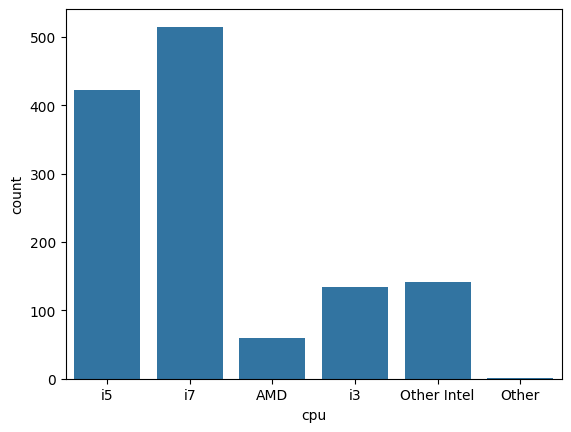

In [60]:
sns.countplot(x='cpu',data=data)

<Axes: xlabel='cpu', ylabel='Price'>

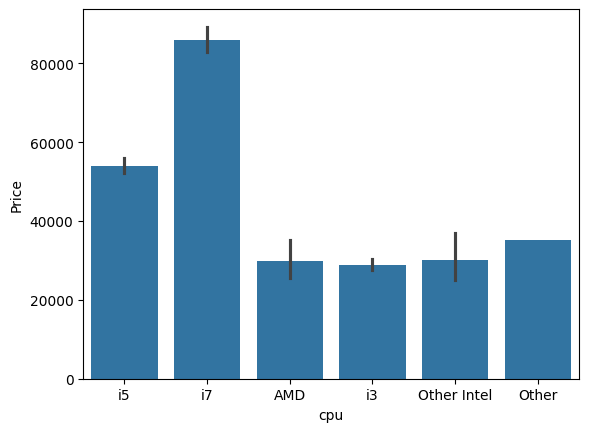

In [61]:
sns.barplot(x='cpu',y='Price',data=data)

In [62]:
data.drop(columns=['Cpu','cpu_name'],inplace=True)

In [63]:
data.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,ips,touchscreen,ppi,cpu
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,1,0,226,i5
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127,i5
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141,i5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,1,0,220,i7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,1,0,226,i5


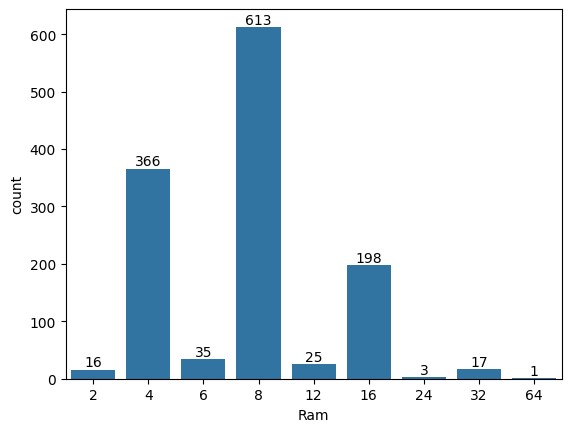

In [64]:
ax = sns.countplot(x='Ram',data=data)

for bar in ax.containers:
    ax.bar_label(bar)

In [65]:
data['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [66]:
data['Memory'].str.findall('\d').apply(lambda x : "".join(x))

0       128
1       128
2       256
3       512
4       256
       ... 
1269    500
1270    128
1271    512
1272     64
1273      1
Name: Memory, Length: 1274, dtype: object

In [67]:
data[data["Memory"]=='128GB SSD +  1TB HDD']['Memory'].str.findall('\d').apply(lambda x : "".join(x))

21      1281
37      1281
73      1281
77      1281
79      1281
        ... 
1228    1281
1229    1281
1238    1281
1256    1281
1259    1281
Name: Memory, Length: 94, dtype: object

In [68]:
pattern = re.compile(r'(\d+(?:GB|TB)\s+(?:SSD|HDD))')
# split_data = re.split(pattern, data['Memory'].str)

data['mem'] = data['Memory'].apply(lambda x : re.split(pattern,x))

In [69]:
data.head(10)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,ips,touchscreen,ppi,cpu,mem
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,1,0,226,i5,"[, 128GB SSD, ]"
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127,i5,[128GB Flash Storage]
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141,i5,"[, 256GB SSD, ]"
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,1,0,220,i7,"[, 512GB SSD, ]"
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,1,0,226,i5,"[, 256GB SSD, ]"
5,Acer,Notebook,15.6,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312,0,0,100,AMD,"[, 500GB HDD, ]"
6,Apple,Ultrabook,15.4,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017,1,0,220,i7,[256GB Flash Storage]
7,Apple,Ultrabook,13.3,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735,0,0,127,i5,[256GB Flash Storage]
8,Asus,Ultrabook,14.0,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79653,0,0,157,i7,"[, 512GB SSD, ]"
9,Acer,Ultrabook,14.0,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,41025,1,0,157,i5,"[, 256GB SSD, ]"


In [70]:
data.drop(columns=['mem'],inplace=True)

In [71]:
data

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,ips,touchscreen,ppi,cpu
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,1,0,226,i5
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127,i5
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141,i5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,1,0,220,i7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,1,0,226,i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378,0,0,100,i7
1270,Lenovo,2 in 1 Convertible,14.0,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992,1,1,157,i7
1271,Lenovo,2 in 1 Convertible,13.3,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866,1,1,276,i7
1272,Lenovo,Notebook,14.0,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201,0,0,111,Other Intel


In [72]:
data['Memory'] = data['Memory'].str.replace('GB','')
data['Memory'] = data['Memory'].str.replace('TB','000')
data['Memory'] = data['Memory'].str.replace('.0','')

In [73]:
new_mem = data['Memory'].str.split('+',n=1,expand=True).fillna('0')
data['first'] = new_mem[0].str.strip()
data['second'] = new_mem[1].str.strip()

In [74]:
data['hdd'] = np.zeros(data.shape[0]).astype('int')
data['ssd'] = np.zeros(data.shape[0]).astype('int')
data['flash'] = np.zeros(data.shape[0]).astype('int')
data['hybrid'] = np.zeros(data.shape[0]).astype('int')

In [75]:
data.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,ips,touchscreen,ppi,cpu,first,second,hdd,ssd,flash,hybrid
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,1,0,226,i5,128 SSD,0,0,0,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127,i5,128 Flash Storage,0,0,0,0,0
2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141,i5,256 SSD,0,0,0,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195,1,0,220,i7,512 SSD,0,0,0,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,1,0,226,i5,256 SSD,0,0,0,0,0


In [76]:
def seperate_mem(col_name):
    for i in range(len(data[col_name])):
        if 'HDD' in data.loc[i,col_name]:
            data.loc[i,'hdd'] = data.loc[i,col_name]
        elif 'SSD' in data.loc[i,col_name]:
            data.loc[i,'ssd'] = data.loc[i,col_name]
        elif 'Flash Storage' in data.loc[i,col_name]:
            data.loc[i,'flash'] = data.loc[i,col_name]
        elif 'Hybrid' in data.loc[i,col_name]:
            data.loc[i,'hybrid'] = data.loc[i,col_name]

In [77]:
seperate_mem('first')
seperate_mem('second')

/tmp/ipykernel_44588/4016842983.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '128 SSD' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i,'ssd'] = data.loc[i,col_name]
/tmp/ipykernel_44588/4016842983.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '128 Flash Storage' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i,'flash'] = data.loc[i,col_name]
/tmp/ipykernel_44588/4016842983.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '500 HDD' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i,'hdd'] = data.loc[i,col_name]
/tmp/ipykernel_44588/4016842983.py:10: FutureWarning: Setting an item of incompatible dtype is deprecat

In [78]:
data.drop(columns=['first','second'],inplace=True)

In [79]:
data.tail(20)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,ips,touchscreen,ppi,cpu,hdd,ssd,flash,hybrid
1254,Dell,Notebook,15.6,4,500 HDD,Intel HD Graphics,Windows 10,2.20,23655,0,0,100,Other Intel,500 HDD,0,0,0
1255,Asus,Notebook,15.6,4,1000 HDD,Intel HD Graphics 500,Windows 10,2.00,18061,0,0,100,Other Intel,1000 HDD,0,0,0
1256,Asus,Gaming,17.3,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 970M,Windows 10,4.00,101232,1,0,127,i7,1000 HDD,128 SSD,0,0
1257,Dell,Notebook,15.6,4,500 HDD,Intel HD Graphics 520,Windows 10,2.29,26107,0,0,100,i3,500 HDD,0,0,0
1258,Lenovo,Notebook,15.6,8,1000 Hybrid,AMD Radeon R5 M330,Windows 7,2.32,47685,0,0,141,i7,0,0,0,1000 Hybrid
1259,MSI,Gaming,15.6,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 960M,Windows 10,2.40,65481,0,0,141,i7,1000 HDD,128 SSD,0,0
1260,Lenovo,2 in 1 Convertible,14.0,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,44382,0,1,157,i5,0,128 SSD,0,0
1261,Asus,Ultrabook,13.3,8,512 SSD,Intel HD Graphics 515,Windows 10,1.20,38841,1,0,165,Other Intel,0,512 SSD,0,0
1262,Dell,Notebook,15.6,6,1000 HDD,Intel HD Graphics 620,Windows 10,2.30,24455,0,0,100,i3,1000 HDD,0,0,0
1263,Acer,Notebook,15.6,4,500 HDD,Intel HD Graphics 400,Linux,2.40,15397,0,0,100,Other Intel,500 HDD,0,0,0


In [80]:
data.isnull().sum()

Company        0
TypeName       0
Inches         0
Ram            0
Memory         0
Gpu            0
OpSys          0
Weight         0
Price          0
ips            0
touchscreen    0
ppi            0
cpu            0
hdd            0
ssd            0
flash          0
hybrid         0
dtype: int64

In [81]:
data['hdd']= data['hdd'].str.replace('HDD','').fillna('0')
data['ssd']= data['ssd'].str.replace('SSD','').fillna('0')
data['hybrid']= data['hybrid'].str.replace('Hybrid','').fillna('0')
data['flash']= data['flash'].str.replace('Flash Storage','').fillna('0')


In [82]:
data.drop('Memory',inplace=True,axis=1)

In [83]:
data

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,ips,touchscreen,ppi,cpu,hdd,ssd,flash,hybrid
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,1,0,226,i5,0,128,0,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127,i5,0,0,128,0
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636,0,0,141,i5,0,256,0,0
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195,1,0,220,i7,0,512,0,0
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,1,0,226,i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,4,Nvidia GeForce 920M,Windows 10,2.20,38378,0,0,100,i7,500,0,0,0
1270,Lenovo,2 in 1 Convertible,14.0,4,Intel HD Graphics 520,Windows 10,1.80,33992,1,1,157,i7,0,128,0,0
1271,Lenovo,2 in 1 Convertible,13.3,16,Intel HD Graphics 520,Windows 10,1.30,79866,1,1,276,i7,0,512,0,0
1272,Lenovo,Notebook,14.0,2,Intel HD Graphics,Windows 10,1.50,12201,0,0,111,Other Intel,0,0,64,0


In [84]:
data['ssd'].unique()
data['hdd'].unique()

array(['0', '500 ', '1000 ', '2000 ', '32 ', '128 '], dtype=object)

In [85]:
data['hdd'] = data['hdd'].astype('int')
data['ssd'] = data['ssd'].astype('int')
data['flash'] = data['flash'].astype('int')
data['hybrid'] = data['hybrid'].astype('int')

In [86]:
data.corr(numeric_only=True)["Price"]

Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
ips            0.250357
touchscreen    0.188630
ppi            0.469306
hdd           -0.097209
ssd            0.675620
flash         -0.037175
hybrid         0.022533
Name: Price, dtype: float64

In [87]:
data.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,ips,touchscreen,ppi,cpu,hdd,ssd,flash,hybrid
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,1,0,226,i5,0,128,0,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127,i5,0,0,128,0
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636,0,0,141,i5,0,256,0,0
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195,1,0,220,i7,0,512,0,0
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,1,0,226,i5,0,256,0,0


In [88]:
data.drop(columns=['flash','hybrid'],inplace=True)

In [89]:
data.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,ips,touchscreen,ppi,cpu,hdd,ssd
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,1,0,226,i5,0,128
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127,i5,0,0
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636,0,0,141,i5,0,256
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195,1,0,220,i7,0,512
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,1,0,226,i5,0,256


In [90]:
data['gpu'] = data['Gpu'].apply(lambda x : x.split()[0])

In [91]:
data['gpu'].value_counts()

gpu
Intel     703
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [92]:
data[data['gpu']=='ARM']

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,ips,touchscreen,ppi,cpu,hdd,ssd,gpu
1191,Samsung,2 in 1 Convertible,12.3,4,ARM Mali T860 MP4,Chrome OS,1.15,35111,1,1,234,Other,0,0,ARM


In [93]:
data = data[data['gpu']!='ARM']

In [95]:
data['gpu'].value_counts()

gpu
Intel     703
Nvidia    396
AMD       174
Name: count, dtype: int64

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Inches       1273 non-null   float64
 3   Ram          1273 non-null   int64  
 4   Gpu          1273 non-null   object 
 5   OpSys        1273 non-null   object 
 6   Weight       1273 non-null   float64
 7   Price        1273 non-null   int64  
 8   ips          1273 non-null   int64  
 9   touchscreen  1273 non-null   int64  
 10  ppi          1273 non-null   int64  
 11  cpu          1273 non-null   object 
 12  hdd          1273 non-null   int64  
 13  ssd          1273 non-null   int64  
 14  gpu          1273 non-null   object 
dtypes: float64(2), int64(7), object(6)
memory usage: 159.1+ KB


<Axes: xlabel='gpu', ylabel='Price'>

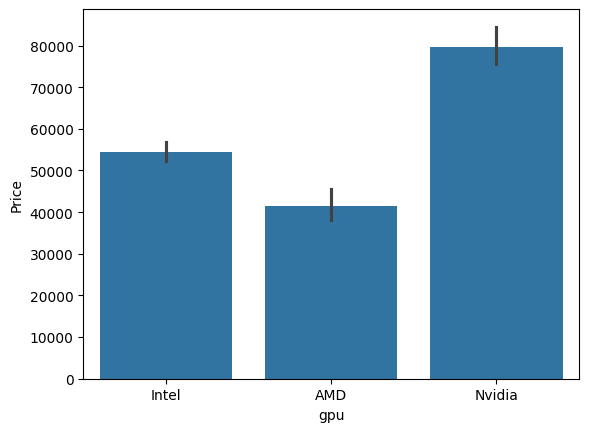

In [97]:
sns.barplot(x='gpu',y='Price',data=data)

In [98]:
data.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,ips,touchscreen,ppi,cpu,hdd,ssd,gpu
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,1,0,226,i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127,i5,0,0,Intel
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636,0,0,141,i5,0,256,Intel
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195,1,0,220,i7,0,512,AMD
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,1,0,226,i5,0,256,Intel


In [99]:
data = data.drop(columns=['Gpu'])

In [100]:
data.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,ips,touchscreen,ppi,cpu,hdd,ssd,gpu
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378,1,0,226,i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895,0,0,127,i5,0,0,Intel
2,HP,Notebook,15.6,8,No OS,1.86,30636,0,0,141,i5,0,256,Intel
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195,1,0,220,i7,0,512,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095,1,0,226,i5,0,256,Intel


In [101]:
data['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

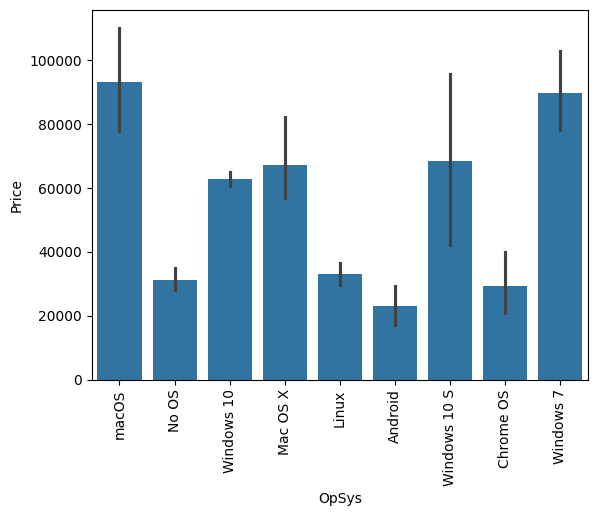

In [102]:
sns.barplot(x='OpSys',y='Price',data=data)
plt.xticks(rotation=90)
plt.show()

In [103]:
def seperate_os(text):
    if 'windows' in text.lower():
        return 'windows'
    elif 'mac' in text.lower():
        return 'macos'
    else:
        return 'others/no os/ linux'

In [104]:
data['os'] = data['OpSys'].apply(seperate_os)

In [105]:
data.sample(5)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,ips,touchscreen,ppi,cpu,hdd,ssd,gpu,os
543,Acer,Gaming,15.6,8,Linux,2.40,42517,0,0,141,i5,1000,0,Nvidia,others/no os/ linux
557,Lenovo,Notebook,17.3,6,Windows 10,2.80,50562,0,0,106,i7,1000,128,Nvidia,windows
217,HP,Notebook,14.0,8,Windows 10,1.63,54931,0,0,157,i7,0,256,Nvidia,windows
114,Dell,Ultrabook,13.3,8,Windows 10,1.21,86793,1,0,165,i5,0,256,Intel,windows
180,Dell,Notebook,15.6,16,Linux,2.02,55890,0,0,141,i7,2000,256,AMD,others/no os/ linux


In [106]:
data.drop(columns=['OpSys'],inplace=True)

<Axes: xlabel='os', ylabel='Price'>

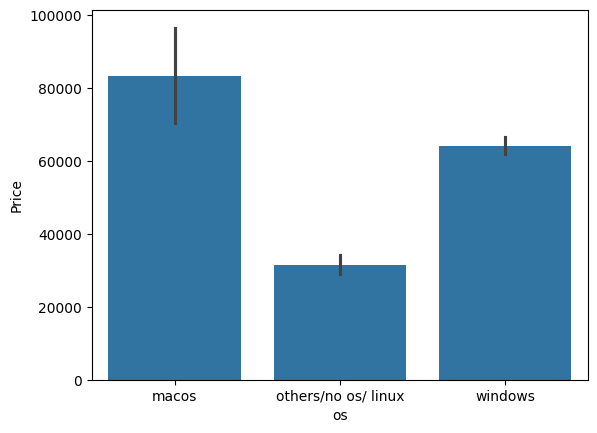

In [107]:
sns.barplot(x='os',y='Price',data=data)

<Axes: xlabel='Weight', ylabel='Price'>

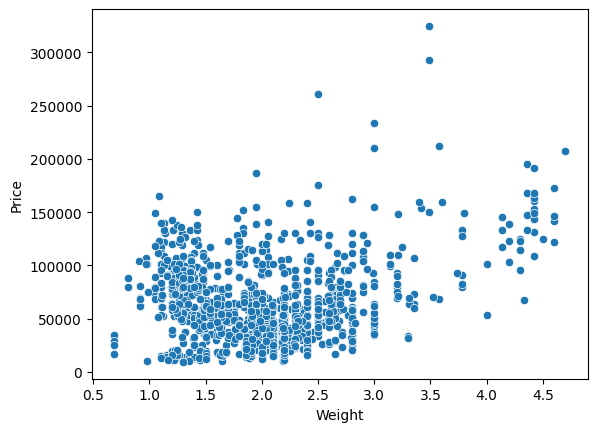

In [108]:
sns.scatterplot(x=data['Weight'],y=data['Price'])

In [109]:
data.head()

,Company,TypeName,Inches,Ram,Weight,Price,ips,touchscreen,ppi,cpu,hdd,ssd,gpu,os
0,Apple,Ultrabook,13.3,8,1.37,71378,1,0,226,i5,0,128,Intel,macos
1,Apple,Ultrabook,13.3,8,1.34,47895,0,0,127,i5,0,0,Intel,macos
2,HP,Notebook,15.6,8,1.86,30636,0,0,141,i5,0,256,Intel,others/no os/ linux
3,Apple,Ultrabook,15.4,16,1.83,135195,1,0,220,i7,0,512,AMD,macos
4,Apple,Ultrabook,13.3,8,1.37,96095,1,0,226,i5,0,256,Intel,macos


<Axes: >

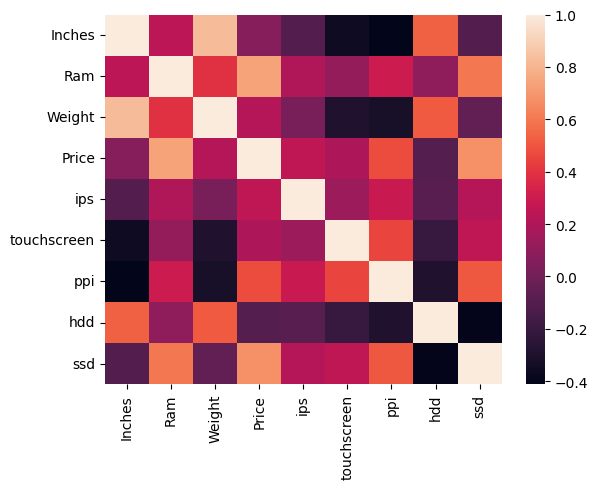

In [110]:
sns.heatmap(data.corr(numeric_only=True))

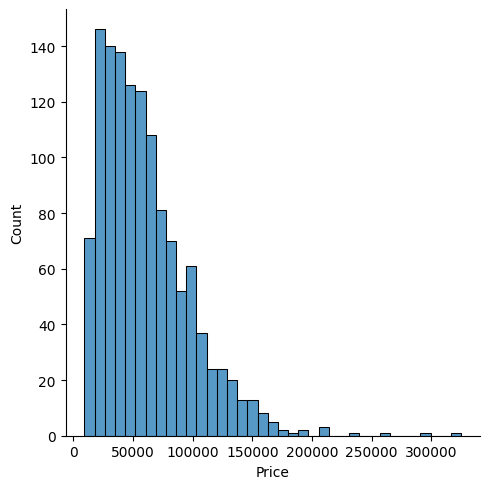

In [111]:
sns.displot(data['Price'])

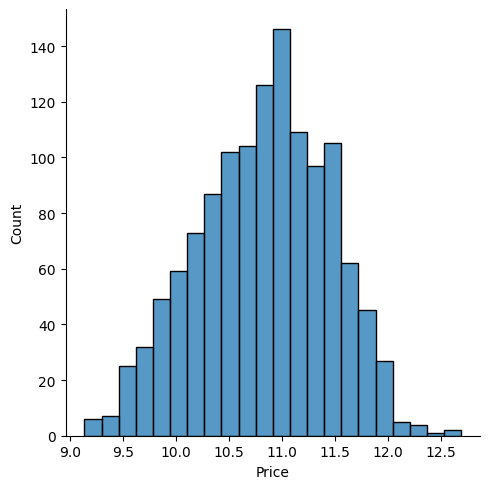

In [112]:
sns.displot(np.log(data['Price']))

In [113]:
data.drop(columns='Inches',inplace=True)

In [114]:
X = data.drop('Price',axis=1)
y = np.log(data['Price'])

In [115]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [116]:
data.head(1)

,Company,TypeName,Ram,Weight,Price,ips,touchscreen,ppi,cpu,hdd,ssd,gpu,os
0,Apple,Ultrabook,8,1.37,71378,1,0,226,i5,0,128,Intel,macos


# Linear Regression

In [117]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11]),
    ('scaling',StandardScaler(),[2,3,6,8,9])
],remainder='passthrough')

# step2 = 

step2= LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print('r2',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))

r2 0.8153552609670751
mae 0.20123091748416197


# GradientBoostingRegressor

In [118]:
step2 = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print('r2',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))

r2 0.8502604656500373
mae 0.18231433943230338


# RandomForestRegressor

In [119]:
step2 = RandomForestRegressor(n_estimators=100,max_depth=10)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print('r2',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))

r2 0.8486484719437661
mae 0.17319092684101578


# XGBRegressor

In [120]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11]),
    ('scaling',StandardScaler(),[2,3,6,8,9])
],remainder='passthrough')


step2 = XGBRegressor(max_depth=4,learning_rate=0.15)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print('r2',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))


/home/applify/anaconda3/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


r2 0.8578891569604408
mae 0.17166509172687236


# SVR

In [121]:
step2 = SVR()
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print('r2',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))

r2 0.8576844938692617
mae 0.17078437121523438


# AdaBoostRegressor

In [122]:
step2 = AdaBoostRegressor()
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print('r2',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))

r2 0.7832524471319755
mae 0.2297854001894038


# ExtraTreesRegressor

In [123]:
step2 = ExtraTreesRegressor(n_estimators=100,max_depth=100,max_features=0.75,max_samples=0.5,bootstrap=True)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print('r2',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))

r2 0.8520997440914652
mae 0.1742093117929275


# DecisionTreeRegressor

In [124]:
step2 = DecisionTreeRegressor(max_depth=10)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print('r2',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))

r2 0.7847351761315228
mae 0.19773812980410704


# KNeighborsRegressor

In [125]:
step2 = KNeighborsRegressor(n_neighbors=3)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print('r2',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))

r2 0.8041324674885826
mae 0.20213572265386287


# Voting Regressor

In [126]:
from sklearn.ensemble import VotingRegressor,StackingRegressor
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11]),
    ('scaling',StandardScaler(),[2,3,6,8,9])
],remainder='passthrough')

rf = RandomForestRegressor(n_estimators=100,max_depth=10)
et = ExtraTreesRegressor(n_estimators=100,max_depth=100,max_features=0.75,max_samples=0.5,bootstrap=True)
gb = GradientBoostingRegressor()
xgb = XGBRegressor(max_depth=4,learning_rate=0.15)
step2 = VotingRegressor([('rf',rf),('et',et),('gb',gb),('xgb',xgb)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print('r2',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))


r2 0.8599831263236845
mae 0.16986353551995056


In [127]:
data

,Company,TypeName,Ram,Weight,Price,ips,touchscreen,ppi,cpu,hdd,ssd,gpu,os
0,Apple,Ultrabook,8,1.37,71378,1,0,226,i5,0,128,Intel,macos
1,Apple,Ultrabook,8,1.34,47895,0,0,127,i5,0,0,Intel,macos
2,HP,Notebook,8,1.86,30636,0,0,141,i5,0,256,Intel,others/no os/ linux
3,Apple,Ultrabook,16,1.83,135195,1,0,220,i7,0,512,AMD,macos
4,Apple,Ultrabook,8,1.37,96095,1,0,226,i5,0,256,Intel,macos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,2.20,38378,0,0,100,i7,500,0,Nvidia,windows
1270,Lenovo,2 in 1 Convertible,4,1.80,33992,1,1,157,i7,0,128,Intel,windows
1271,Lenovo,2 in 1 Convertible,16,1.30,79866,1,1,276,i7,0,512,Intel,windows
1272,Lenovo,Notebook,2,1.50,12201,0,0,111,Other Intel,0,0,Intel,windows


# Exporting the model

In [129]:
import pickle
pickle.dump(data,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe-final.pkl','wb'))
